# Eksamen Økonometri A

**eksamennumre:** 25, 36, 9

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import mymlr as mlr

## Opgave 1

# Opgave 1.a

In [38]:
# Læs CSV-fil
df = pd.read_csv('cars.csv')

# Brug .describe() og formater værdierne
describe_df = df.describe(percentiles=[]).T  # Transponér for bedre oversigt

# Runder tallene i beskrivelsen til f.eks. to decimaler
describe_df.applymap(lambda x: f"{x:.4f}")


C:\Users\imvaa\AppData\Local\Temp\ipykernel_13428\4201310867.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  describe_df.applymap(lambda x: f"{x:.4f}")


,count,mean,std,min,50%,max
year,9694.0000,2001.0968,11.0770,1980.0000,2002.0000,2018.0000
product_id,9694.0000,486.6750,278.9975,0.0000,512.0000,1066.0000
sales,9694.0000,59103.3910,86940.2541,10.0000,27394.0000,891482.0000
number_households,9694.0000,107213264.9061,13932786.2775,80780000.0000,109300000.0000,127590000.0000
price,9694.0000,36.0477,17.1266,11.1448,31.8202,99.9864
height,9694.0000,60.9481,8.4115,43.5000,57.7000,107.5000
footprint,9694.0000,13392.6300,1968.9152,6514.5400,13330.0640,21821.8590
weight,9694.0000,3561.2111,897.7655,1113.0000,3470.5000,8550.0000
hp,9694.0000,192.1820,83.8824,44.0000,175.0000,645.0000
mpg,9694.0000,20.9362,6.5830,10.0000,19.0000,50.0000


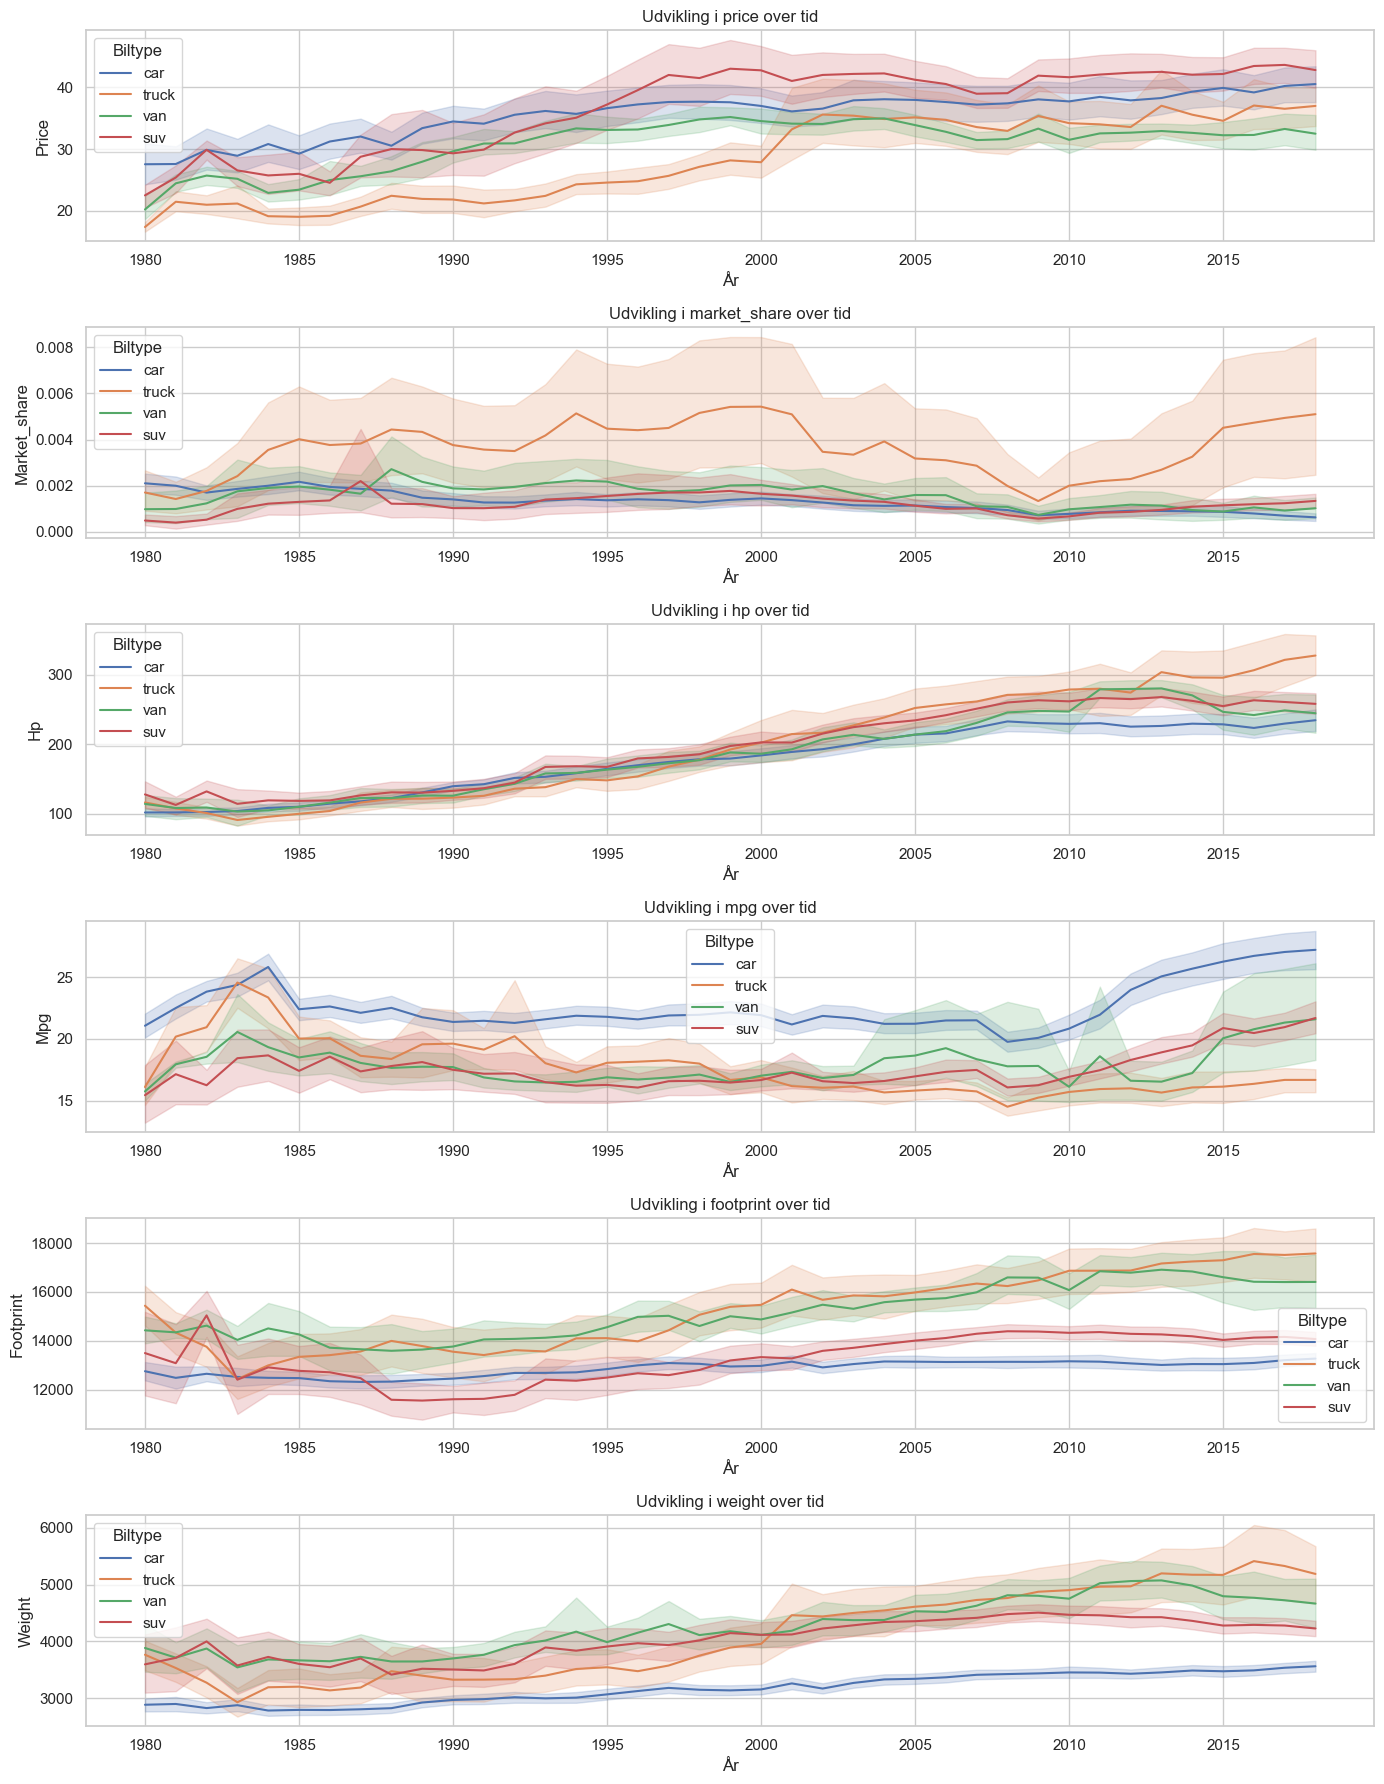

In [16]:

df['car_type'] = df[['car', 'suv', 'truck', 'van']].idxmax(axis=1)

# Liste over de variabler, vi vil plotte over tid
attributes = ['price', 'market_share', 'hp', 'mpg', 'footprint', 'weight']

# Opret figurer med underplots for hver variabel
plt.figure(figsize=(14, 18))
for i, attribute in enumerate(attributes, 1):
    plt.subplot(len(attributes), 1, i)
    sns.lineplot(data=df, x='year', y=attribute, hue= df.car_type)  # 'car_type' bør være navnet på biltypekolonnen
    plt.title(f"Udvikling i {attribute} over tid")
    plt.xlabel("År")
    plt.ylabel(attribute.capitalize())
    plt.legend(title='Biltype')

plt.tight_layout()
plt.show()

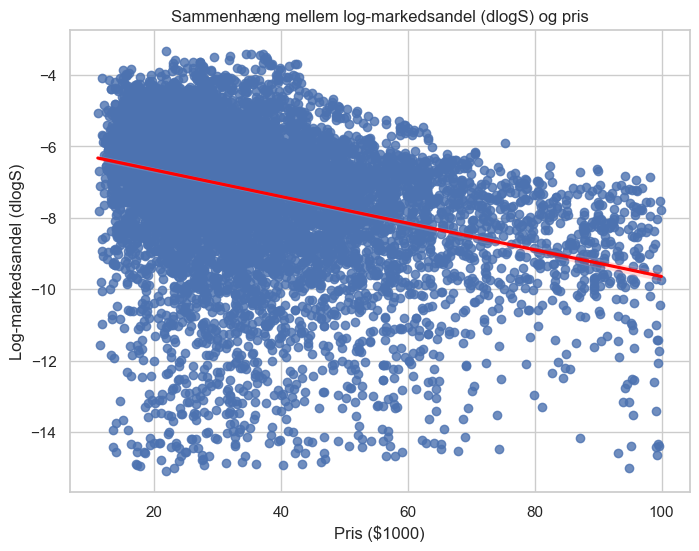

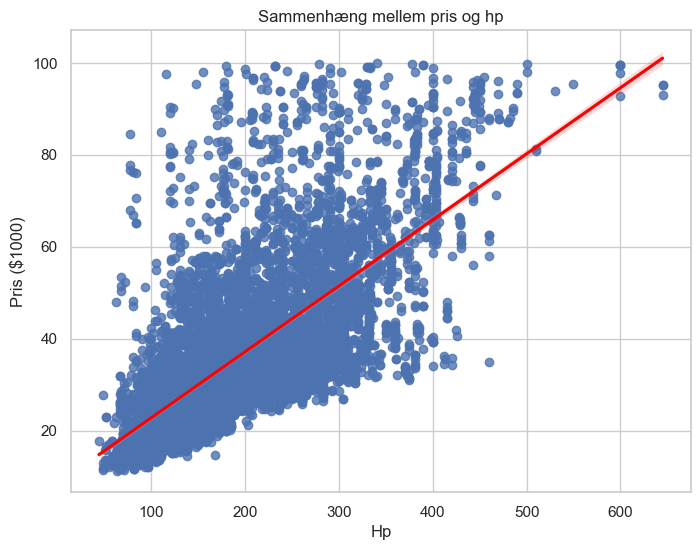

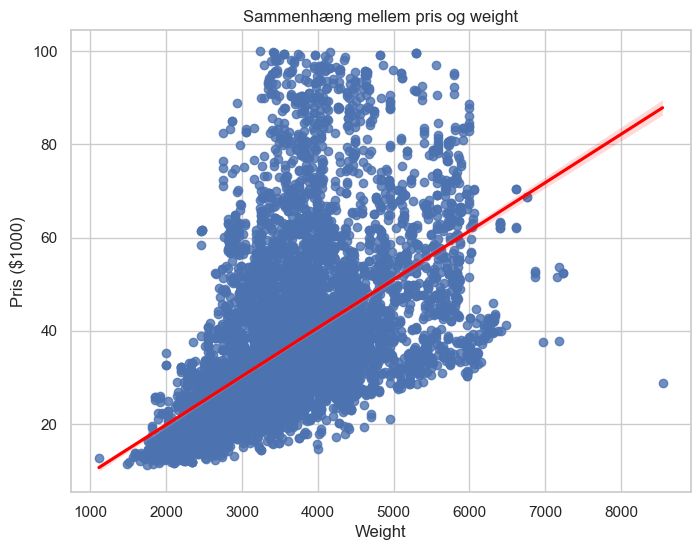

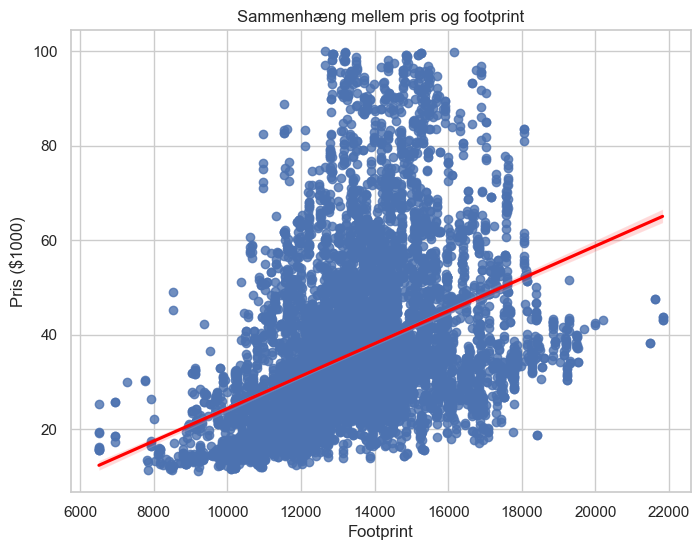

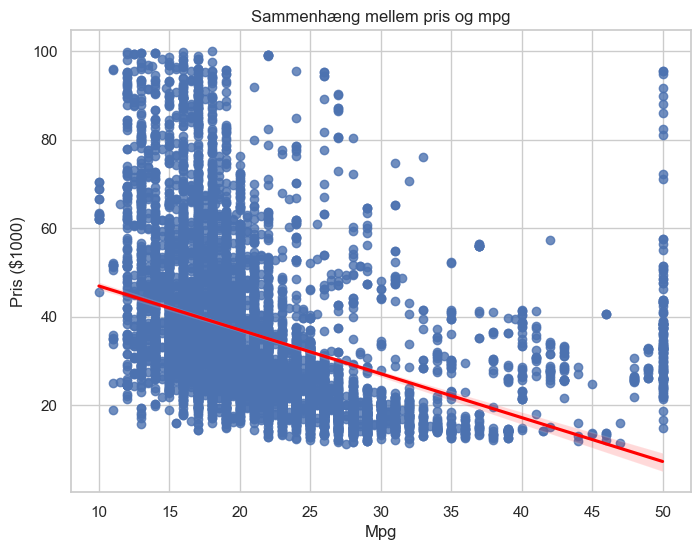

Regression mellem dlogS og price:
                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1152.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          1.30e-238
Time:                        10:59:30   Log-Likelihood:                -19742.
No. Observations:                9694   AIC:                         3.949e+04
Df Residuals:                    9692   BIC:                         3.950e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9

In [20]:
# 1. Scatter plot mellem dlogS og price med regressionslinje
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='price', y='dlogS', line_kws={"color": "red"})
plt.title("Sammenhæng mellem log-markedsandel (dlogS) og pris")
plt.xlabel("Pris ($1000)")
plt.ylabel("Log-markedsandel (dlogS)")
plt.show()

# 2. Scatter plots mellem price og fysiske attributter med regressionslinjer
attributes = ['hp', 'weight', 'footprint', 'mpg']

for attribute in attributes:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=df, x=attribute, y='price', line_kws={"color": "red"})
    plt.title(f"Sammenhæng mellem pris og {attribute}")
    plt.xlabel(attribute.capitalize())
    plt.ylabel("Pris ($1000)")
    plt.show()

# 3. Regressionsanalyser
# Regressionsmodel for dlogS som funktion af price
X = df[['price']]
X = sm.add_constant(X)  # Tilføj konstantled til regressionsmodellen
y = df['dlogS']
model = sm.OLS(y, X).fit()
print("Regression mellem dlogS og price:")
print(model.summary())

# Regressionsmodeller for price som funktion af de fysiske attributter
for attribute in attributes:
    X = df[[attribute]]
    X = sm.add_constant(X)
    y = df['price']
    model = sm.OLS(y, X).fit()
    print(f"\nRegression mellem price og {attribute}:")
    print(model.summary())

## Opgave 1.b


In [43]:
df = pd.read_csv('cars.csv')
# Dummy for 'year'
df = pd.get_dummies(df, columns=['year'], drop_first=True)

In [44]:
model1 = smf.ols('dlogS ~ price + hp + mpg + height + footprint + weight + number_trims + releaseYear + yearsSinceDesign + sport + EV + truck + suv + van', data=df)
# Dummy for 'year'
results1 = model1.fit(cov_type = 'HC1')
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     249.7
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:32:19   Log-Likelihood:                -18557.
No. Observations:                9694   AIC:                         3.714e+04
Df Residuals:                    9679   BIC:                         3.725e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.4138      0.291  

In [42]:
model1 = smf.ols('dlogS ~ price + hp + mpg + height + footprint + weight + number_trims + releaseYear + yearsSinceDesign + sport + EV + truck + suv + van', data=df)
# Dummy for 'year'
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     296.4
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:31:57   Log-Likelihood:                -18557.
No. Observations:                9694   AIC:                         3.714e+04
Df Residuals:                    9679   BIC:                         3.725e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.4138      0.291  